In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib

In [25]:
# Step 1: Load the dataset
data = pd.read_csv('C:\\Users\\swati\\Desktop\\fraud detection\\creditcard_2023.csv')

In [26]:
# Read the CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\swati\\Desktop\\fraud detection\\creditcard_2023.csv')

# Display the first five rows of the DataFrame using the head() method
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7   
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014  \
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25   
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280  \
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [27]:
print(df.tail())

            id        V1        V2        V3        V4        V5        V6   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454  \
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23   
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249  \
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
5686

In [28]:
# Step 2: Data preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [29]:
# Remove or impute missing values if necessary
data.dropna(inplace=True)

In [30]:
# Step 3: Feature Engineering
# Feature scaling
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [31]:
# Drop unnecessary columns
data.drop(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 
           'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 
           'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1, inplace=True)

In [32]:
# Step 4: Splitting data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [33]:
print(X)

          Amount  Amount_Scaled
0       17982.10       0.858447
1        6531.37      -0.796369
2        2513.54      -1.377011
3        5384.44      -0.962119
4       14278.97       0.323285
...          ...            ...
568625   4394.16      -1.105231
568626   4653.40      -1.067766
568627  23572.85       1.666401
568628  10160.83      -0.271853
568629  21493.92       1.365962

[568630 rows x 2 columns]


In [34]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [35]:
# Step 5: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Print the shapes of X_train, X_test, y_train, and y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# print the first few rows of X_train, X_test, y_train, and y_test
print("\nX_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_train:")
print(y_train.head())
print("\ny_test:")
print(y_test.head())

X_train shape: (454904, 2)
X_test shape: (113726, 2)
y_train shape: (454904,)
y_test shape: (113726,)

X_train:
          Amount  Amount_Scaled
373474  10182.15      -0.268772
424048  12325.14       0.040924
409855   3066.08      -1.297160
90244   21745.34       1.402296
175414   9666.38      -0.343310

X_test:
          Amount  Amount_Scaled
437378   8633.18      -0.492624
504222  12299.55       0.037226
4794     5215.87      -0.986480
388411  19282.98       1.046445
424512  19114.27       1.022064

y_train:
373474    1
424048    1
409855    1
90244     0
175414    0
Name: Class, dtype: int64

y_test:
437378    1
504222    1
4794      0
388411    1
424512    1
Name: Class, dtype: int64


In [37]:
# Step 6: Handling class imbalance using Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [38]:
# Print the value counts of y_train before and after resampling
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
Class
0    227565
1    227339
Name: count, dtype: int64

After SMOTE:
Class
1    227565
0    227565
Name: count, dtype: int64


In [39]:
# Step 7: Model training
# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [41]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
   'n_estimators': [100, 200],  # Reduced number of estimators
    'max_depth': [10, 20],  # Reduced number of depth values
    'min_samples_split': [2, 5],  # Reduced number of split values
    'min_samples_leaf': [1, 2]  # Reduced number of leaf values
}

In [42]:
# Reduce the number of cross-validation folds
cv_folds = 3  # Adjust this value as needed

In [45]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv_folds, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [46]:
# Selecting the best model
best_rf_model = grid_search.best_estimator_

In [47]:
# Step 8: Saving the best model
joblib.dump(best_rf_model, 'credit_card_fraud_detection_model.pkl')

['credit_card_fraud_detection_model.pkl']

In [48]:
# Step 9: Model evaluation
# Making predictions on original testing set
y_pred = best_rf_model.predict(X_test)

In [49]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.49980655259131596
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47     56750
           1       0.50      0.55      0.52     56976

    accuracy                           0.50    113726
   macro avg       0.50      0.50      0.50    113726
weighted avg       0.50      0.50      0.50    113726

Confusion Matrix:
 [[25655 31095]
 [25790 31186]]


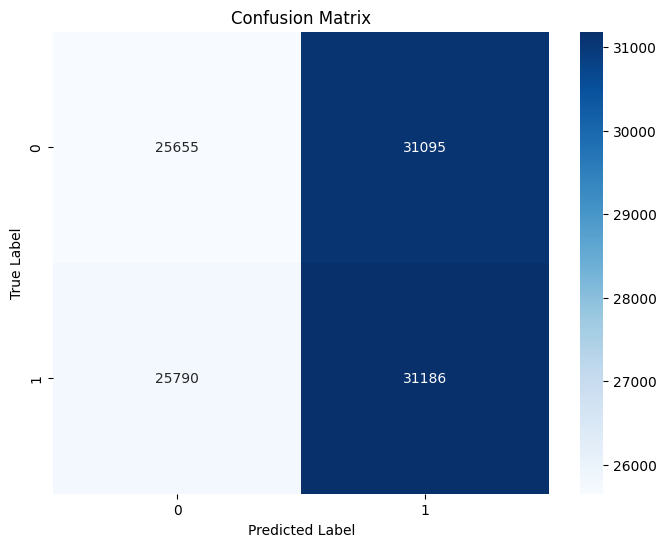

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = best_rf_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()